 <strong><em><h1>
 Шаг 1 и Шаг 2. Открытие таблицы и предобработка данных </em></strong></h1>

<h4><div class="alert alert-block alert-info">
Для начала импортируем таблицу и изучим в каких столбцах имеются пропуски. </div></h4>

In [1]:
import pandas as pd

In [2]:
real = pd.read_csv('real_estate_data.csv', sep = '\t')
real.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">
    <h5>Комментарии по таблице: </h5>
    
1) общее количество строк - 23699 и это подтверждается большим количеством столбцов с таким же количеством.
    
2) last price нужно перевести в целочисленный формат, тк копейки в недвижимости только запутают.

3) first_day_exposition перевести столбец в формат времени и округлить до дня.
    
4) ceilling_height отсутствует больше половины показателей высоты - нужно найти аналоги по адресу и подставить высоту по возможности.
    
5) floors_total отсутствует небольшое количество показателей
    
6) living_area имеются пропуски относительно количества столбцов. Есть гипотеза что отсутствие значений в living area и kitchen area может быть связано с bool-параметром open-plan. Если планировка свободная то ни кухни ни жилой площади там не будет. 
    
7) is_apartment слишком мало значений заполнено - скорее всего нужно сделать dtype типа bool и вопрос решится
    
8) kitchen_area отсутствуют пропуски - нужно проверить связаны ли они с пропусками living area. Есть гипотеза, что в некоторых квартирах кухня объединена с залом и поэтому как-таковой площади кухни нету. Разберемся. 
    
9) balcony больше половины значений не заполнено - скорее всего там, где отсутствует балкон просто ничего не заполняли.
    
10) locality_name - имеется небольшое количество пропусков. Так как параметр важный то опустим отсутствующие значения.
    
11) airport_nearest, parks_around3000, ponds3000 , parks_nearest, ponds_nearest, cityCenters_nearest - большое количество пропусков скорее всего связано с человеческим фактором: отсутствием знаний при заполнении объявления. Попробую найти данную информацию и имплементировать в данные таблицы
    
12)days_exposition - почти 3000 пропусков постараюсь заполнить средним показателем подобных объектов с известной величиной  </div>

<div class="alert alert-block alert-info">
<h5>Начинаем с простых действий</h5>
2) Меняем тип last_price в int
7) Меняем тип is_apartment на bool
 </div>

In [4]:
real['is_apartment'] = real['is_apartment'].astype(bool)
real['last_price'] = real['last_price'].astype(int)
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">
3) переводим first_day_exposition во временной формат и округляем до дня</div>

In [5]:
real['time_to_day'] = pd.to_datetime(real['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#real['time_to_day'] = real['first_day_exposition'].real.round('1D')  
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19


<div class="alert alert-block alert-info">
округление не пригодилось - тк везде время было по нулям система сама убрала часы</div>

<div class="alert alert-block alert-info">
4) ceiling_height большое количество пропусков, ищем взаимосвязи: </div>

In [6]:
real['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [7]:
real['ceiling_height'].loc[real['ceiling_height'] > 5].value_counts()
#.sort_values(by = 'ceiling_height', ascending = True)

27.0     8
25.0     7
8.0      3
5.3      2
32.0     2
14.0     1
5.2      1
6.0      1
8.3      1
5.6      1
5.8      1
10.3     1
5.5      1
20.0     1
26.0     1
22.6     1
27.5     1
24.0     1
100.0    1
Name: ceiling_height, dtype: int64

<div class="alert alert-block alert-info">
 Путем изучения показателей граница адекватных и неадекватных значений кончается на пороге 
    между 5.2 (дорогущая 300м2 квартира в Петербурге) и 5.3 (50м2 с такими потолками неадекват). 
    Гипотеза следующая: значения в промежутке от 20.0 до 32.0 можно объяснить неправильным заполнением запятой, 
        поэтому эти значения следуюет скорректировать делением на 10 </div>

In [8]:
real.query('ceiling_height == 27.0').sort_values(by = 'ceiling_height', ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
4876,7,3000000,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,True,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,2017-09-27
5246,0,2500000,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,True,...,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,2017-10-13
5807,17,8150000,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,True,...,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,2019-01-09
10773,8,3800000,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0,2017-10-13
17857,1,3900000,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0,2017-12-22
20478,11,8000000,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,True,...,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0,2017-07-18
21824,20,2450000,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,...,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-12
22938,14,4000000,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0,2018-03-15


<div class="alert alert-block alert-info">
 В квартирах с потолками 27 метров не замечено чего-то необычного - типовая площадь, типовая цена, поэтому гипотеза подтверждается, меняем. </div>

In [9]:
import numpy as np

In [10]:
real.loc[real['ceiling_height'] > 23 , 'ceiling_height'] /= 10
real.query('ceiling_height > 23')



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day


<div class="alert alert-block alert-info">
От значений с ошибкой по человеческому фактору избавились, но остается ещё несколько значений в промежутке от 5.3, которые разумному объяснению не поддаются, поэтому надежнее всего их "обнулить" чтобы затем заполнить медианой по нескольким признакам.  </div>

In [11]:
real_see = real.query('ceiling_height > 5.2').sort_values(by = 'ceiling_height', ascending = False)
real_see

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
20507,12,5950000,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,True,...,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0,2018-02-19
17496,15,6700000,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,True,...,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN,2019-02-19
15061,19,5600000,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,True,...,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0,2018-05-11
22309,20,5300000,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,True,...,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,2017-09-30
22869,0,15000000,25.0,2018-07-25T00:00:00,1,10.0,5.0,14.0,5,True,...,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,2018-07-25
5863,20,5650000,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,True,...,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0,2018-08-15
3474,3,1400000,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,2018-03-16
15743,14,5600000,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,True,...,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0,2016-11-11
17442,0,5350000,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,True,...,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0,2015-06-16
20264,17,119000000,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,True,...,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0,2017-07-10


In [12]:
real['ceiling_height'] = np.where(real.ceiling_height > 5.2, 0, real.ceiling_height)



In [13]:
real['ceiling_height'].isna().sum()

9195

<div class="alert alert-block alert-info">
Таким образом у нас получилось большое количество nan значений, которые будем приводить среднее значение. </div>

<div class="alert alert-block alert-info">
Применим метод transform по нескольким столбцам с полным заполнением и добьемся максимального восстановления данных.  </div>

In [14]:
real['ceiling_height'] = real['ceiling_height'].fillna(real.groupby('total_area')['ceiling_height'].transform('median'))
real.head(8)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.700,16.0,51.0,8,True,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.700,11.0,18.6,1,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.600,5.0,34.3,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.140,14.0,NaN,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.030,14.0,32.0,13,True,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19
5,10,2890000,30.4,2018-09-10T00:00:00,1,2.520,12.0,14.4,5,True,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018-09-10
6,6,3700000,37.3,2017-11-02T00:00:00,1,2.650,26.0,10.6,6,True,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2017-11-02
7,5,7915000,71.6,2019-04-18T00:00:00,2,2.775,24.0,NaN,22,True,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2019-04-18


In [15]:
real['ceiling_height'].isna().sum()

627

In [16]:
real['ceiling_height'] = real['ceiling_height'].fillna(real.groupby('rooms')['ceiling_height'].transform('median'))
real[['last_price','total_area','ceiling_height']].head(15)

,last_price,total_area,ceiling_height
0,13000000,108.00,2.700
1,3350000,40.40,2.700
2,5196000,56.00,2.600
3,64900000,159.00,3.140
4,10000000,100.00,3.030
5,2890000,30.40,2.520
6,3700000,37.30,2.650
7,7915000,71.60,2.775
8,2900000,33.16,2.600
9,5400000,61.00,2.500


In [17]:
real['ceiling_height'].isna().sum()

1

In [18]:
real['ceiling_height'].unique()

array([2.7  , 2.6  , 3.14 , 3.03 , 2.52 , 2.65 , 2.775, 2.5  , 2.67 ,
       2.56 , 2.65 , 3.05 , 2.75 , 2.725, 2.9  , 2.8  , 2.53 , 2.55 ,
       3.   , 3.2  , 2.675, 2.61 , 2.565, 3.25 , 3.45 , 2.77 , 2.85 ,
       2.64 , 2.57 , 4.15 , 3.5  , 2.585, 2.625, 2.725, 3.3  , 2.71 ,
       4.   , 2.47 , 2.59 , 2.73 , 2.84 , 3.1  , 2.58 , 2.34 , 2.555,
       3.4  , 3.06 , 2.72 , 2.54 , 2.51 , 2.78 , 2.575, 2.76 , 3.7  ,
       5.2  , 2.825, 3.33 , 2.87 , 2.66 , 2.   , 2.755, 2.985, 3.11 ,
       2.45 , 3.6  , 2.69 , 2.92 , 3.355, 2.545, 2.605, 3.13 , 3.8  ,
       3.15 , 3.55 , 2.74 , 3.16 , 2.875, 3.62 , 2.525, 3.12 , 2.53 ,
       2.62 , 2.96 , 2.46 , 0.   , 2.535, 5.   , 2.79 , 2.615, 2.95 ,
       3.125, 4.06 , 2.94 , 3.82 , 3.54 , 2.915, 3.53 , 2.83 , 3.04 ,
       4.7  , 2.4  , 3.38 , 3.01 , 3.65 , 3.025, 3.9  , 2.635, 3.18 ,
       3.35 , 2.3  , 3.57 , 2.48 , 2.82 , 2.57 , 2.63 , 3.98 , 2.85 ,
       2.655, 3.83 , 3.52 , 3.95 , 2.975, 3.75 , 2.88 , 3.67 , 2.505,
       3.87 , 3.66 ,

<div class="alert alert-block alert-info">
В столбце остались ещё значения равные 0 и 1 - явно не адекватные. Но их не так много, поэтому просто их уберем. </div>

In [19]:
real = real.query('ceiling_height > 2.2 ')

In [20]:
real.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.700,16.0,51.00,8,True,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.700,11.0,18.60,1,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.600,5.0,34.30,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
3,0,64900000,159.00,2015-07-24T00:00:00,3,3.140,14.0,NaN,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.030,14.0,32.00,13,True,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.520,12.0,14.40,5,True,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018-09-10
6,6,3700000,37.30,2017-11-02T00:00:00,1,2.650,26.0,10.60,6,True,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,2017-11-02
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.775,24.0,NaN,22,True,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2019-04-18
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.600,27.0,15.43,26,True,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2018-05-23
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.500,9.0,43.60,7,True,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2017-02-26


In [21]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23665 non-null  int64         
 1   last_price            23665 non-null  int64         
 2   total_area            23665 non-null  float64       
 3   first_day_exposition  23665 non-null  object        
 4   rooms                 23665 non-null  int64         
 5   ceiling_height        23665 non-null  float64       
 6   floors_total          23579 non-null  float64       
 7   living_area           21767 non-null  float64       
 8   floor                 23665 non-null  int64         
 9   is_apartment          23665 non-null  bool          
 10  studio                23665 non-null  bool          
 11  open_plan             23665 non-null  bool          
 12  kitchen_area          21397 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-info">
Теперь количество переменных в столбце ceiling_height_tran соответствует количеству строк. </div>

<div class="alert alert-block alert-info">
В столбце floors_total отсутствует небольшое количество значений, но проверим насколько введенные данные адекватные. </div>

In [22]:
real['floors_total'].isna().sum()

86

In [23]:
real['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

<div class="alert alert-block alert-info">
Кроме пропущенных значений всё выглядит реалистично, поэтому просто заменим их. </div>

In [24]:
real['floors_total'] = real['floors_total'].fillna(real.groupby('floor')['floors_total'].transform('median'))
real['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [25]:
real['floors_total'].isna().sum()

0

In [26]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23665 non-null  int64         
 1   last_price            23665 non-null  int64         
 2   total_area            23665 non-null  float64       
 3   first_day_exposition  23665 non-null  object        
 4   rooms                 23665 non-null  int64         
 5   ceiling_height        23665 non-null  float64       
 6   floors_total          23665 non-null  float64       
 7   living_area           21767 non-null  float64       
 8   floor                 23665 non-null  int64         
 9   is_apartment          23665 non-null  bool          
 10  studio                23665 non-null  bool          
 11  open_plan             23665 non-null  bool          
 12  kitchen_area          21397 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-info">
Теперь пропусков в столбце с этажностью floors_total_fix нету, можно продолжать </div>

<div class="alert alert-block alert-info">
6) убираем пропуски living_area

In [27]:

real['living_area'].isna().sum()



1898

In [28]:
real['living_area'] = real['living_area'].fillna(real.groupby('total_area')['living_area'].transform('median'))
real['living_area'].isna().sum()

142

In [29]:
real['living_area'] = real['living_area'].fillna(real.groupby('rooms')['living_area'].transform('median'))
real['living_area'].isna().sum()

0

In [30]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23665 non-null  int64         
 1   last_price            23665 non-null  int64         
 2   total_area            23665 non-null  float64       
 3   first_day_exposition  23665 non-null  object        
 4   rooms                 23665 non-null  int64         
 5   ceiling_height        23665 non-null  float64       
 6   floors_total          23665 non-null  float64       
 7   living_area           23665 non-null  float64       
 8   floor                 23665 non-null  int64         
 9   is_apartment          23665 non-null  bool          
 10  studio                23665 non-null  bool          
 11  open_plan             23665 non-null  bool          
 12  kitchen_area          21397 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-info">
Применил метод transform два раза, для полной замены пропущенных значений. </div>

<div class="alert alert-block alert-info">
        8) заполняем пропуски в столбце kitchen_area методом transform по столбцу total_area </div>

In [31]:
real['kitchen_area'].isna().sum()

2268

In [32]:
real['kitchen_area'] = real['kitchen_area'].fillna(real.groupby('total_area')['kitchen_area'].transform('median'))
real['kitchen_area'].isna().sum()

204

In [33]:
real['kitchen_area'] = real['kitchen_area'].fillna(real.groupby('living_area')['kitchen_area'].transform('median'))
real['kitchen_area'].isna().sum()

24

In [34]:
real[real['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
155,8,96000000,317.00,2017-07-07T00:00:00,4,3.50,3.0,183.00,3,True,...,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,2017-07-07
440,8,2480000,27.11,2018-03-12T00:00:00,0,2.70,17.0,24.75,4,True,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,2018-03-12
1588,3,1900000,21.89,2018-11-01T00:00:00,1,2.60,19.0,10.93,17,True,...,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2018-11-01
3311,3,2385000,24.62,2018-11-22T00:00:00,1,2.60,19.0,15.61,17,True,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,32.0,2018-11-22
3618,16,4000000,75.03,2014-12-15T00:00:00,2,2.53,3.0,66.22,3,True,...,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,588.0,2014-12-15
3836,15,6700000,41.82,2018-11-22T00:00:00,1,2.60,14.0,17.03,14,True,...,NaN,Санкт-Петербург,18893.0,4358.0,0.0,NaN,1.0,665.0,26.0,2018-11-22
4998,4,3720000,26.60,2018-09-20T00:00:00,1,2.60,22.0,13.27,4,True,...,NaN,Санкт-Петербург,35756.0,9329.0,0.0,NaN,1.0,379.0,40.0,2018-09-20
7577,11,2000000,20.60,2018-09-19T00:00:00,1,2.60,18.0,10.55,17,True,...,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-19
7921,1,2204000,27.55,2019-04-01T00:00:00,1,2.75,12.0,16.41,12,True,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2019-04-01
8737,0,2900000,27.36,2016-03-25T00:00:00,1,2.60,25.0,23.19,19,True,...,0.0,Санкт-Петербург,11761.0,13378.0,0.0,NaN,0.0,NaN,157.0,2016-03-25


 <div class="alert alert-block alert-info">
Так как логичных замен по площади, кроме как средняя по жилому метражу и общему не придумать, а они не справились с небольшим количетеством данных ( 24 строки), то просто удаляем их. </div>

In [35]:
real.dropna(subset = ['kitchen_area'],inplace = True)
real['kitchen_area'].isna().sum()

0

 <div class="alert alert-block alert-info">
9) balcony заполняем половину пустых значений. Для начала смотрим какие вообще переменные упоминаются методом unique </div>

In [36]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23641 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23641 non-null  int64         
 1   last_price            23641 non-null  int64         
 2   total_area            23641 non-null  float64       
 3   first_day_exposition  23641 non-null  object        
 4   rooms                 23641 non-null  int64         
 5   ceiling_height        23641 non-null  float64       
 6   floors_total          23641 non-null  float64       
 7   living_area           23641 non-null  float64       
 8   floor                 23641 non-null  int64         
 9   is_apartment          23641 non-null  bool          
 10  studio                23641 non-null  bool          
 11  open_plan             23641 non-null  bool          
 12  kitchen_area          23641 non-null  float64       
 13  balcony         

In [37]:
real['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

 <div class="alert alert-block alert-info">
так как в параметрах есть значения c 0 показателем, то лучше всего будет заполнить пропуски по столбцу rooms методом transform так как логично предположить что чем больше комнат тем больше балконов может быть. Если все пропуски не уберутся то второй метод заполнения пропуском применим через total_area </div>

In [38]:
real['balcony'].isna().sum()

11490

In [39]:
real['balcony'] = real['balcony'].fillna(real.groupby('rooms')['balcony'].transform('median'))
real['kitchen_area'].isna().sum()

0

In [40]:
real['balcony'].unique()

array([1. , 2. , 0. , 5. , 4. , 3. , nan, 0.5])

 <div class="alert alert-block alert-info">
после замены все-равно осталось несколько некорректных значений, поэтому приведем их к нулю,что наиболее вероятное </div>

In [41]:
real['balcony'] = real['balcony'].where(real.balcony > 0.5, 0)

In [42]:
real['balcony'].unique()

array([1., 2., 0., 5., 4., 3.])

In [43]:
real['balcony'] = real['balcony'].astype(int)

In [44]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23641 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23641 non-null  int64         
 1   last_price            23641 non-null  int64         
 2   total_area            23641 non-null  float64       
 3   first_day_exposition  23641 non-null  object        
 4   rooms                 23641 non-null  int64         
 5   ceiling_height        23641 non-null  float64       
 6   floors_total          23641 non-null  float64       
 7   living_area           23641 non-null  float64       
 8   floor                 23641 non-null  int64         
 9   is_apartment          23641 non-null  bool          
 10  studio                23641 non-null  bool          
 11  open_plan             23641 non-null  bool          
 12  kitchen_area          23641 non-null  float64       
 13  balcony         

 <div class="alert alert-block alert-info">
12) удаляем пропуски в locality_name и начнем изучать второй часть таблицы, связанную с расстояниями.  </div>

In [45]:
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,1,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.70,11.0,18.6,1,True,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
3,0,64900000,159.0,2015-07-24T00:00:00,3,3.14,14.0,95.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,1,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19


In [46]:
real['locality_name'].dropna()

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23592, dtype: object

In [47]:
cities_count = real.groupby(['locality_name']).count().sort_values(by = 'airports_nearest', ascending = False)
good_cities = cities_count[cities_count['airports_nearest'] >= 1]
#cities_count.query['airports_nearest > 1'] #['locality_name']['airports_nearest'].agg('count').sort_values(ascending = False)

 <div class="alert alert-block alert-info">
Заполняем пропуски airports_nearest. Для начала попробуем метод transform </div>

In [48]:
real['airports_nearest'].isna().sum()

5518

In [49]:
real['airports_nearest'] = real['airports_nearest'].fillna(real.groupby('locality_name')['airports_nearest'].transform('median'))
real['airports_nearest'].isna().sum()


5370

 <div class="alert alert-block alert-info">
Метод transform практически не помог тк есть большой перегиб в сторону данных о Питере, а о других не так много. Учитывая что близость к аэропорту не критичный параметр, и крупность города не зависит от близости к аэропорту, поэтому заполним пропуски вручную исходя из описания столбца методом describe. </div>

In [50]:
real['airports_nearest'].describe()

count    18271.000000
mean     28869.675634
std      12678.926532
min          0.000000
25%      18634.000000
50%      26764.000000
75%      37342.500000
max      84869.000000
Name: airports_nearest, dtype: float64

 <div class="alert alert-block alert-info">
использую значение 75% известных данных </div>

In [51]:
real['airports_nearest'] = real['airports_nearest'].fillna(37313)
real['airports_nearest'].isna().sum()

0

In [52]:
real['airports_nearest'].describe()

count    23641.000000
mean     30787.557781
std      11694.187216
min          0.000000
25%      21172.000000
50%      33338.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

 <div class="alert alert-block alert-info">
повторим ту же операцию со всеми столбцами отражающими расстояние и количество достопримечательностей. </div>

In [53]:
real['cityCenters_nearest'].describe()

count    18146.000000
mean     14196.932216
std       8609.388480
min        181.000000
25%       9238.000000
50%      13105.000000
75%      16293.750000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [54]:
real['cityCenters_nearest'] = real['cityCenters_nearest'].fillna(16293)

In [55]:
real['parks_around3000'].describe()

count    18147.000000
mean         0.611065
std          0.801633
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [56]:
real['parks_around3000'] = real['parks_around3000'].fillna(1)

In [57]:
real['parks_around3000'].isna().sum()

0

In [58]:
real['parks_nearest'].describe()

count    8063.000000
mean      490.652363
std       342.077901
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [59]:
real['parks_nearest'] = real['parks_nearest'].fillna(612)

In [60]:
real['parks_around3000'].isna().sum()

0

In [61]:
real['ponds_nearest'].isna().sum()

14551

In [62]:
real['ponds_nearest'].describe()

count    9090.000000
mean      518.177228
std       277.744090
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [63]:
real['ponds_nearest'] = real['ponds_nearest'].fillna(729)

In [64]:
real['ponds_nearest'].describe()

count    23641.000000
mean       647.938327
std        200.445051
min         13.000000
25%        637.000000
50%        729.000000
75%        729.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [65]:
real['ponds_around3000'].isna().sum()

5494

In [66]:
real['ponds_around3000'].describe()

count    18147.000000
mean         0.769604
std          0.937826
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [67]:
real['ponds_around3000'] = real['ponds_around3000'].fillna(1)

In [68]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23641 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23641 non-null  int64         
 1   last_price            23641 non-null  int64         
 2   total_area            23641 non-null  float64       
 3   first_day_exposition  23641 non-null  object        
 4   rooms                 23641 non-null  int64         
 5   ceiling_height        23641 non-null  float64       
 6   floors_total          23641 non-null  float64       
 7   living_area           23641 non-null  float64       
 8   floor                 23641 non-null  int64         
 9   is_apartment          23641 non-null  bool          
 10  studio                23641 non-null  bool          
 11  open_plan             23641 non-null  bool          
 12  kitchen_area          23641 non-null  float64       
 13  balcony         

 <div class="alert alert-block alert-info">
Судя по таблице остался один столбец с пропусками days_exposition </div>

In [69]:
real[real['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.700,16.0,51.0,8,True,...,1,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.775,24.0,44.3,22,True,...,2,Санкт-Петербург,23982.0,11634.0,0.0,612.0,0.0,729.0,NaN,2019-04-18
44,13,5350000,40.00,2018-11-18T00:00:00,1,2.700,22.0,18.0,3,True,...,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,2018-11-18
45,17,5200000,50.60,2018-12-02T00:00:00,2,2.650,9.0,30.3,7,True,...,1,Санкт-Петербург,30011.0,12872.0,0.0,612.0,0.0,729.0,NaN,2018-12-02
46,17,6600000,52.10,2019-01-31T00:00:00,2,2.600,24.0,29.7,9,True,...,2,Санкт-Петербург,15114.0,12702.0,0.0,612.0,0.0,729.0,NaN,2019-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02T00:00:00,4,3.000,26.0,71.4,17,True,...,1,Санкт-Петербург,11827.0,11459.0,0.0,612.0,0.0,729.0,NaN,2018-11-02
23685,15,2490000,31.00,2019-01-24T00:00:00,1,2.500,5.0,17.3,5,True,...,1,Ломоносов,48393.0,51818.0,0.0,612.0,0.0,729.0,NaN,2019-01-24
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.700,5.0,73.3,3,True,...,1,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,2017-03-21
23696,18,2500000,56.70,2018-02-11T00:00:00,2,2.670,3.0,29.7,1,True,...,1,село Рождествено,37313.0,16293.0,1.0,612.0,1.0,729.0,NaN,2018-02-11


Заменим пропуски по столбцу last_price, тк срок продажи сильно зависит от цены.

In [70]:
real['days_exposition'] = real['days_exposition'].fillna(real.groupby('last_price')['days_exposition'].transform('median'))
real['days_exposition'].isna().sum()

305

 <div class="alert alert-block alert-info">
Оставшиеся пропуски уберем по столбцу rooms так как количество комнат сильно завязано со сроком продажи. </div>

In [71]:
real['days_exposition'] = real['days_exposition'].fillna(real.groupby('rooms')['days_exposition'].transform('median'))
real['days_exposition'].isna().sum()

0

In [72]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23641 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23641 non-null  int64         
 1   last_price            23641 non-null  int64         
 2   total_area            23641 non-null  float64       
 3   first_day_exposition  23641 non-null  object        
 4   rooms                 23641 non-null  int64         
 5   ceiling_height        23641 non-null  float64       
 6   floors_total          23641 non-null  float64       
 7   living_area           23641 non-null  float64       
 8   floor                 23641 non-null  int64         
 9   is_apartment          23641 non-null  bool          
 10  studio                23641 non-null  bool          
 11  open_plan             23641 non-null  bool          
 12  kitchen_area          23641 non-null  float64       
 13  balcony         

In [73]:
real['last_price'] = real['last_price'] / 1000
real['floors_total'] = real['floors_total'].astype(int)
real['airports_nearest'] = real['airports_nearest'].astype(int)
real['cityCenters_nearest'] = real['cityCenters_nearest'].astype(int)
real['parks_around3000'] = real['parks_around3000'].astype(int)
real['parks_nearest'] = real['parks_nearest'].astype(int)
real['ponds_around3000'] = real['ponds_around3000'].astype(int)
real['ponds_nearest'] = real['ponds_nearest'].astype(int)
real['days_exposition'] = real['days_exposition'].astype(int)

In [74]:
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,1,Санкт-Петербург,18863,16028,1,482,2,755,141,2019-03-07
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,True,...,2,посёлок Шушары,12817,18603,0,612,0,729,81,2018-12-04
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,True,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,2015-08-20
3,0,64900.0,159.0,2015-07-24T00:00:00,3,3.14,14,95.0,9,True,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,2015-07-24
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,1,Санкт-Петербург,31856,8098,2,112,1,48,121,2018-06-19


In [75]:
real2 = real.copy()

In [76]:
real2.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,1,Санкт-Петербург,18863,16028,1,482,2,755,141,2019-03-07
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,True,...,2,посёлок Шушары,12817,18603,0,612,0,729,81,2018-12-04
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,True,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,2015-08-20
3,0,64900.0,159.0,2015-07-24T00:00:00,3,3.14,14,95.0,9,True,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,2015-07-24
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,1,Санкт-Петербург,31856,8098,2,112,1,48,121,2018-06-19


 <strong><em><h1>
 Шаг 3. Подсчет и добавление в таблицу </em></strong></h1>

<h4><div class="alert alert-block alert-info">
Цена квадратного метра. </div></h4>

In [77]:
real['square_metr'] = (real['last_price']/real['total_area']).round(2)

In [78]:
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day,square_metr
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,Санкт-Петербург,18863,16028,1,482,2,755,141,2019-03-07,120.37
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,True,...,посёлок Шушары,12817,18603,0,612,0,729,81,2018-12-04,82.92
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,True,...,Санкт-Петербург,21741,13933,1,90,2,574,558,2015-08-20,92.79
3,0,64900.0,159.0,2015-07-24T00:00:00,3,3.14,14,95.0,9,True,...,Санкт-Петербург,28098,6800,2,84,3,234,424,2015-07-24,408.18
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,Санкт-Петербург,31856,8098,2,112,1,48,121,2018-06-19,100.00


<h4><div class="alert alert-block alert-info">
День недели, месяц и год публикации объявления </div></h4>

In [79]:
real['weekday'] = real['time_to_day'].dt.weekday
real['month'] =real['time_to_day'].dt.month
real['year'] =real['time_to_day'].dt.year

In [80]:
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day,square_metr,weekday,month,year
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,1,482,2,755,141,2019-03-07,120.37,3,3,2019
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,True,...,0,612,0,729,81,2018-12-04,82.92,1,12,2018
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,True,...,1,90,2,574,558,2015-08-20,92.79,3,8,2015
3,0,64900.0,159.0,2015-07-24T00:00:00,3,3.14,14,95.0,9,True,...,2,84,3,234,424,2015-07-24,408.18,4,7,2015
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,2,112,1,48,121,2018-06-19,100.00,1,6,2018


<h4><div class="alert alert-block alert-info">
Распределение этажей на первый, последний, другой </div></h4>

In [81]:
real['which_floor'] = np.where(real.floor == real.floors_total, 'последний',
         (np.where(real.floor == 1, 'первый', 'другой')))
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,time_to_day,square_metr,weekday,month,year,which_floor
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,482,2,755,141,2019-03-07,120.37,3,3,2019,другой
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,True,...,612,0,729,81,2018-12-04,82.92,1,12,2018,первый
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,True,...,90,2,574,558,2015-08-20,92.79,3,8,2015,другой
3,0,64900.0,159.0,2015-07-24T00:00:00,3,3.14,14,95.0,9,True,...,84,3,234,424,2015-07-24,408.18,4,7,2015,другой
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,112,1,48,121,2018-06-19,100.00,1,6,2018,другой


<h4><div class="alert alert-block alert-info">
Соотношение жилой площади к общей площади и отношение кухни к общей. </div></h4>

In [82]:
real['living_to_total'] = (real['living_area'] / real['total_area']).round(2)
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,time_to_day,square_metr,weekday,month,year,which_floor,living_to_total
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,2,755,141,2019-03-07,120.37,3,3,2019,другой,0.47
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,True,...,0,729,81,2018-12-04,82.92,1,12,2018,первый,0.46
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,True,...,2,574,558,2015-08-20,92.79,3,8,2015,другой,0.61
3,0,64900.0,159.0,2015-07-24T00:00:00,3,3.14,14,95.0,9,True,...,3,234,424,2015-07-24,408.18,4,7,2015,другой,0.60
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,1,48,121,2018-06-19,100.00,1,6,2018,другой,0.32


In [83]:
real['kitchen_to_total'] = (real['kitchen_area'] / real['total_area']).round(2)
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,time_to_day,square_metr,weekday,month,year,which_floor,living_to_total,kitchen_to_total
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,755,141,2019-03-07,120.37,3,3,2019,другой,0.47,0.23
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,True,...,729,81,2018-12-04,82.92,1,12,2018,первый,0.46,0.27
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,True,...,574,558,2015-08-20,92.79,3,8,2015,другой,0.61,0.15
3,0,64900.0,159.0,2015-07-24T00:00:00,3,3.14,14,95.0,9,True,...,234,424,2015-07-24,408.18,4,7,2015,другой,0.60,0.09
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,48,121,2018-06-19,100.00,1,6,2018,другой,0.32,0.41


 <strong><em><h1>
 Шаг 4. Исследовательский анализ данных </em></strong></h1>

<h4><div class="alert alert-block alert-info">
Изучение параметов: площадь, цена, число комнат, высота потолков. </div></h4>

<h4><div class="alert alert-block alert-info">
Построим гистограмму для каждого параметра.
  </div></h4>

<h4><div class="alert alert-block alert-info">
Площадь
  </div></h4>

In [84]:
import matplotlib.pyplot as plt

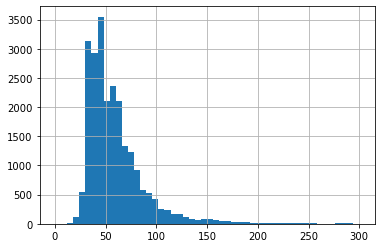

In [85]:
real['total_area'].hist( range = (0, 300),bins = 50)
plt.show('Общая площадь')

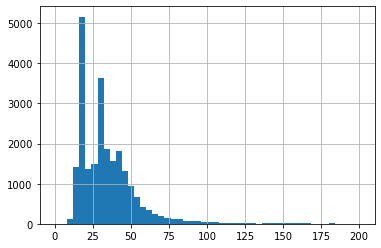

In [86]:
real['living_area'].hist(range = (0, 200),bins = 50)
plt.show('Жилая площадь')

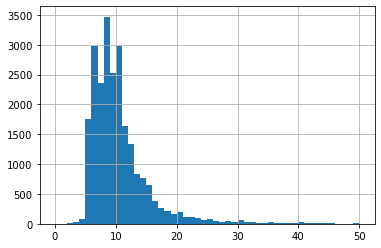

In [87]:
real['kitchen_area'].hist(range = (0, 50),bins = 50)
plt.show('Площадь кухни')

<div class="alert alert-block alert-info">
1) Общая площадь отражается вполне корректно - большинство квартир в продаже около 50м2, а больше 150м2 квартиры - это штучный товар.
    
2) Замечено странный пик в районе 12м2 - крайне мало как для среднестатистической 50м2 квартиры - второй пик в районе 30-32м2 более характерен.
    
3) В гистрограмме площади кухонь всё резонно - имеется несколько пиков, связанных с типовыми планировками от советского союза, где площадь четко равна определенным типовым значения ( 7, 9, 12м2)</div>

<h4><div class="alert alert-block alert-info">
Время продажи квартир
  </div></h4>

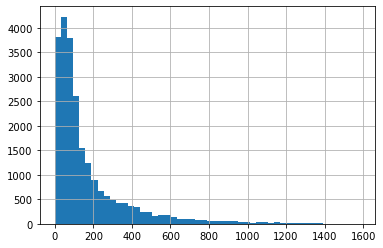

In [88]:
real['days_exposition'].hist(range = (0,1580), bins = 50)
plt.show()

In [89]:
real['days_exposition'].describe()

count    23641.000000
mean       172.083076
std        208.040714
min          1.000000
25%         45.000000
50%         94.000000
75%        206.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [90]:
real['days_exposition'].median()

94.0

In [91]:
real['days_exposition'].mean()

172.08307601201304

<div class="alert alert-block alert-info">
Исходя из гистограммы, а также глядя на средние и медианные значения делаю следующие выводы: 
    
1) средний срок продажи - 94 дня или 3 месяца
    
2) чрезвычайно успешная продажа - меньше 45 дней. Всего 25% от общего количества выборки. Однако на графике около нуля есть необычный пик с которым нужно разобраться. 
    
3) Есть большое отклонение между средним значением (172 дня в продаже) и медианным.Скорее всего дело в нескольких излишне больших показателях.
    
4) Всё, что в продаже больше 400 дней - является практически в четыре раза дольше среднестатистической продажи. Дальше - уже ненормально. 
    
</div>

<h4><div class="alert alert-block alert-info">
Убираем выбивающиеся значения.
  </div></h4>

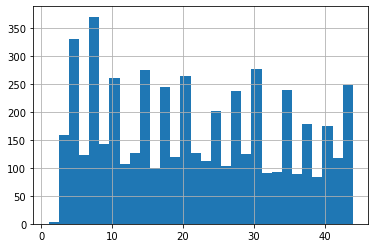

In [92]:
real['days_exposition'][real['days_exposition'] < 45].hist(bins = 30)
plt.show("график")

<div class="alert alert-block alert-info">
По самым быстрым продажам каких-либо аномалий не вижу.
    
</div>

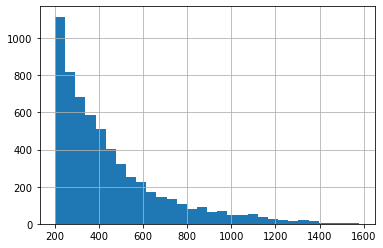

In [93]:
real['days_exposition'][real['days_exposition'] > 200].hist(bins = 30)
plt.show("график")

In [94]:
real[real['days_exposition'] > 200]['days_exposition'].describe()

count    6075.000000
mean      447.237531
std       243.468198
min       201.000000
25%       269.000000
50%       370.000000
75%       546.000000
max      1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-block alert-info">
Больше 400 дней (больше года!) - предельное значение, дольше которого выборку стоит отсеять.
</div>

In [95]:
real['last_price'].describe()

count     23641.00000
mean       6525.75873
std       10805.78664
min          12.19000
25%        3420.00000
50%        4650.00000
75%        6800.00000
max      763000.00000
Name: last_price, dtype: float64

In [96]:
real[real['rooms'] > 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,time_to_day,square_metr,weekday,month,year,which_floor,living_to_total,kitchen_to_total
52,20,11795.0,136.0,2017-09-22T00:00:00,6,3.000,2,94.00,2,True,...,729,165,2017-09-22,86.73,4,9,2017,последний,0.69,0.08
201,5,10880.0,123.1,2015-11-12T00:00:00,6,3.200,5,89.00,2,True,...,729,992,2015-11-12,88.38,3,11,2015,другой,0.72,0.09
464,15,66571.0,280.3,2015-06-11T00:00:00,6,5.200,8,159.50,7,True,...,616,578,2015-06-11,237.50,3,6,2015,другой,0.57,0.08
509,5,90000.0,225.0,2016-06-26T00:00:00,6,3.330,4,134.00,2,True,...,519,416,2016-06-26,400.00,6,6,2016,другой,0.60,0.09
581,20,65000.0,365.0,2019-03-18T00:00:00,7,2.900,7,101.00,7,True,...,58,46,2019-03-18,178.08,0,3,2019,последний,0.28,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23281,20,24800.0,231.2,2015-01-21T00:00:00,6,3.100,5,99.80,4,True,...,795,467,2015-01-21,107.27,2,1,2015,другой,0.43,0.12
23395,4,40000.0,188.0,2017-05-29T00:00:00,6,3.475,6,109.51,4,True,...,62,30,2017-05-29,212.77,0,5,2017,другой,0.58,0.17
23400,17,30000.0,213.0,2017-09-28T00:00:00,7,3.400,5,151.40,5,True,...,30,299,2017-09-28,140.85,3,9,2017,последний,0.71,0.14
23448,3,14700.0,180.0,2018-02-08T00:00:00,6,3.000,6,126.00,5,True,...,616,76,2018-02-08,81.67,3,2,2018,другой,0.70,0.11


In [97]:
len(real)

23641

In [98]:
good_real = real.query('days_exposition < 400 and last_price > 2000 < 15000 and total_area > 20 < 400 and rooms < 5')
len(good_real)

19241

<h4><div class="alert alert-block alert-info">
Изучаем корреляцию
  </div></h4>

<h6><div class="alert alert-block alert-info">
Отношение цены к площади, количеству комнат и близости к центру.
  </div></h6>

In [99]:
columns = ['last_price','rooms','total_area','cityCenters_nearest']
corr = pd.DataFrame(good_real, columns=columns)
corr.head()

,last_price,rooms,total_area,cityCenters_nearest
0,13000.0,3,108.0,16028
1,3350.0,1,40.4,18603
4,10000.0,2,100.0,8098
5,2890.0,1,30.4,16293
6,3700.0,1,37.3,19143


In [100]:
corr.corr()

,last_price,rooms,total_area,cityCenters_nearest
last_price,1.000000,0.323112,0.654979,-0.255971
rooms,0.323112,1.000000,0.715621,-0.119624
total_area,0.654979,0.715621,1.000000,-0.200933
cityCenters_nearest,-0.255971,-0.119624,-0.200933,1.000000


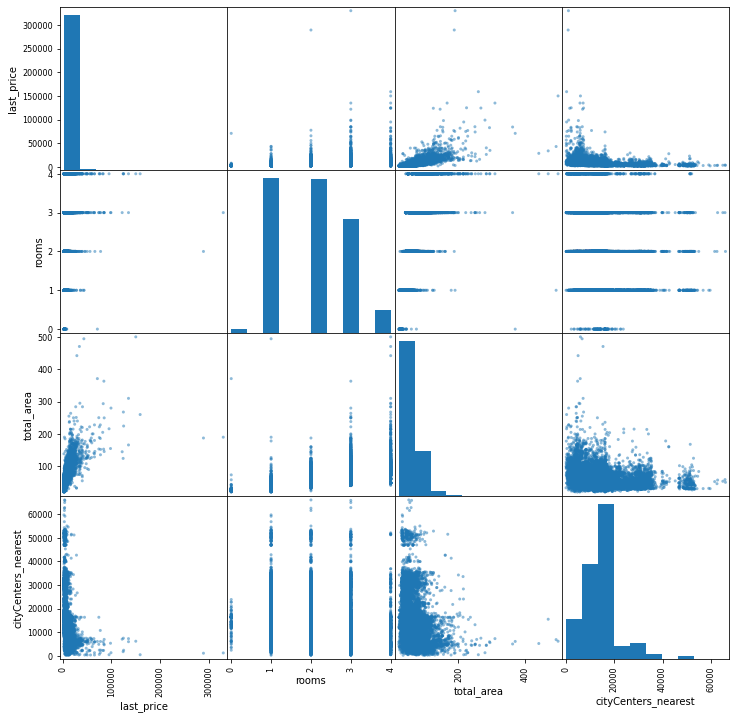

In [101]:
pd.plotting.scatter_matrix(corr, figsize=(12, 12)) 
plt.show()

<div class="alert alert-block alert-info">
Изучив корреляцию цены к количеству комнат, площади и близости к центру увидели следующее: 
1) Корреляция цены к площади и количеству комнат прямая - чем больше комнат, тем больше цена.
2) Корреляция близости к центру предсказуемо обратная - выше всего цена и что более интересно площади квартир, которые находятся ближе к центру.
    
</div>

<h6><div class="alert alert-block alert-info">
Зависимость цены от этажа, на котором находится квартира.
  </div></h6>

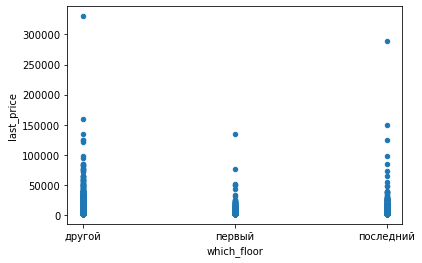

In [102]:
good_real.plot(y = 'last_price', x = 'which_floor', kind = 'scatter')
plt.show()

<div class="alert alert-block alert-info">
C учетом актуальных реалий высотного строительства экстраординарные цены встречаются на последних этажах, тн "пентхаусах", в остальном же более высокий потолок цен встречается у средних этажей, а на первом цены значительно ниже
  </div>

<h6><div class="alert alert-block alert-info">
Зависимость от даты размещения:
  </div></h6>

<h6><div class="alert alert-block alert-info">
День недели:
  </div></h6>

In [103]:
good_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19241 entries, 0 to 23696
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19241 non-null  int64         
 1   last_price            19241 non-null  float64       
 2   total_area            19241 non-null  float64       
 3   first_day_exposition  19241 non-null  object        
 4   rooms                 19241 non-null  int64         
 5   ceiling_height        19241 non-null  float64       
 6   floors_total          19241 non-null  int64         
 7   living_area           19241 non-null  float64       
 8   floor                 19241 non-null  int64         
 9   is_apartment          19241 non-null  bool          
 10  studio                19241 non-null  bool          
 11  open_plan             19241 non-null  bool          
 12  kitchen_area          19241 non-null  float64       
 13  balcony         

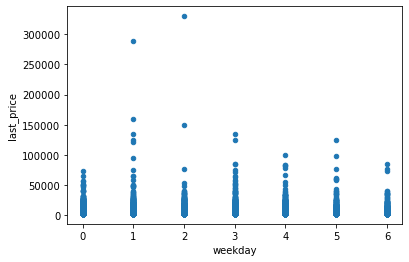

-0.005830392941626696

In [104]:
good_real.plot(y = 'last_price', x = 'weekday', kind = 'scatter')
plt.show()
good_real['last_price'].corr(good_real['weekday'])

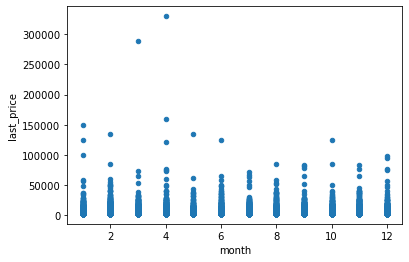

-0.009100731334277808

In [105]:
good_real.plot(y = 'last_price', x = 'month', kind = 'scatter')
plt.show()
good_real['last_price'].corr(good_real['month'])

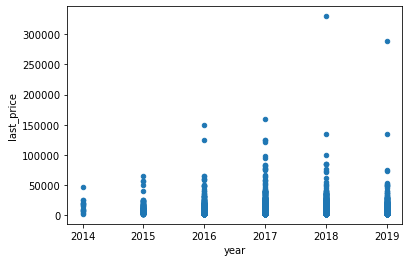

-0.006786645186143565

In [106]:
good_real.plot(y = 'last_price', x = 'year', kind = 'scatter')
plt.show()
good_real['last_price'].corr(good_real['year'])

<div class="alert alert-block alert-info">
Что касается дня недели - то корреляция от дня ко дню отсутствует. 
То же самое можно сказать по поводу месяцев, вопреки устойчивому слуху о сезонности роста цен.
А вот годовая корреляция четко показывает что цены в 2017 году были максимальными по сравнению с предыдущими и последующими годами и сейчас тенденция идет на снижение.
  </div>

<h6><div class="alert alert-block alert-info">
Средняя стоимость и цена квадратного метра в 10 крупнейших городах
  </div></h6>

In [107]:
local_name = good_real.pivot_table(
    index='locality_name', values='last_price', aggfunc='count'
)
local_name.columns = [ 'count']

good_names = local_name.query('count >= 175')
good_names['count'].sum()


#good_stat2 = station_stat_full.query('count > 30').pivot_table(
    #index='name', values='time_spent', aggfunc=['median', 'count']
#)

16233

In [108]:
top10towns = good_real.query('locality_name in @good_names.index')
top10towns

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,time_to_day,square_metr,weekday,month,year,which_floor,living_to_total,kitchen_to_total
0,20,13000.0,108.00,2019-03-07T00:00:00,3,2.700,16,51.0,8,True,...,755,141,2019-03-07,120.37,3,3,2019,другой,0.47,0.23
1,7,3350.0,40.40,2018-12-04T00:00:00,1,2.700,11,18.6,1,True,...,729,81,2018-12-04,82.92,1,12,2018,первый,0.46,0.27
4,2,10000.0,100.00,2018-06-19T00:00:00,2,3.030,14,32.0,13,True,...,48,121,2018-06-19,100.00,1,6,2018,другой,0.32,0.41
6,6,3700.0,37.30,2017-11-02T00:00:00,1,2.650,26,10.6,6,True,...,729,155,2017-11-02,99.20,3,11,2017,другой,0.28,0.39
7,5,7915.0,71.60,2019-04-18T00:00:00,2,2.775,24,44.3,22,True,...,729,92,2019-04-18,110.54,3,4,2019,другой,0.62,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200.0,39.00,2017-12-16T00:00:00,1,2.650,9,20.0,6,True,...,729,38,2017-12-16,82.05,5,12,2017,другой,0.51,0.28
23688,19,9200.0,101.00,2019-04-01T00:00:00,3,3.050,15,63.0,12,True,...,729,23,2019-04-01,91.09,0,4,2019,другой,0.62,0.15
23689,13,3550.0,35.30,2018-02-28T00:00:00,1,2.860,15,16.3,4,True,...,652,29,2018-02-28,100.57,2,2,2018,другой,0.46,0.26
23690,3,5500.0,52.00,2018-07-19T00:00:00,2,2.600,5,31.0,2,True,...,729,15,2018-07-19,105.77,3,7,2018,другой,0.60,0.12


In [109]:
columns = ['locality_name','last_price', 'square_metr']
most_expensive = pd.DataFrame(top10towns, )
most_expensive

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,time_to_day,square_metr,weekday,month,year,which_floor,living_to_total,kitchen_to_total
0,20,13000.0,108.00,2019-03-07T00:00:00,3,2.700,16,51.0,8,True,...,755,141,2019-03-07,120.37,3,3,2019,другой,0.47,0.23
1,7,3350.0,40.40,2018-12-04T00:00:00,1,2.700,11,18.6,1,True,...,729,81,2018-12-04,82.92,1,12,2018,первый,0.46,0.27
4,2,10000.0,100.00,2018-06-19T00:00:00,2,3.030,14,32.0,13,True,...,48,121,2018-06-19,100.00,1,6,2018,другой,0.32,0.41
6,6,3700.0,37.30,2017-11-02T00:00:00,1,2.650,26,10.6,6,True,...,729,155,2017-11-02,99.20,3,11,2017,другой,0.28,0.39
7,5,7915.0,71.60,2019-04-18T00:00:00,2,2.775,24,44.3,22,True,...,729,92,2019-04-18,110.54,3,4,2019,другой,0.62,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200.0,39.00,2017-12-16T00:00:00,1,2.650,9,20.0,6,True,...,729,38,2017-12-16,82.05,5,12,2017,другой,0.51,0.28
23688,19,9200.0,101.00,2019-04-01T00:00:00,3,3.050,15,63.0,12,True,...,729,23,2019-04-01,91.09,0,4,2019,другой,0.62,0.15
23689,13,3550.0,35.30,2018-02-28T00:00:00,1,2.860,15,16.3,4,True,...,652,29,2018-02-28,100.57,2,2,2018,другой,0.46,0.26
23690,3,5500.0,52.00,2018-07-19T00:00:00,2,2.600,5,31.0,2,True,...,729,15,2018-07-19,105.77,3,7,2018,другой,0.60,0.12


In [110]:
most_expensive2 = most_expensive.pivot_table(index = 'locality_name', values = ('last_price','square_metr'), aggfunc = 'mean')
#most_expensive2.columns ( columns = ['last_price', 'square_metr'])
most_expensive2.sort_values(by = 'last_price', ascending = False).round(0)

,last_price,square_metr
locality_name,,
Санкт-Петербург,7100.0,113.0
Пушкин,5948.0,103.0
посёлок Парголово,4526.0,90.0
деревня Кудрово,4286.0,93.0
посёлок Шушары,4106.0,79.0
Всеволожск,3959.0,70.0
Колпино,3838.0,75.0
посёлок Мурино,3691.0,86.0
Гатчина,3609.0,71.0


<div class="alert alert-block alert-info">
Предсказуемо самое дорогое место для покупки жилья - это Санкт-Петербург. Далее идет г.Пушкин, а на 3 месте поселок.
Худшим среди лучших является г.Выборг, с ценой в 2 раза меньше чем в Питере
  </div>

In [111]:
piter = good_real.query('locality_name == "Санкт-Петербург"')
piter['cityCenters_nearest_km'] = (piter['cityCenters_nearest']/ 1000).round(0)
center = piter.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean')
center

<ipython-input-111-b0b5e5fc0bec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  piter['cityCenters_nearest_km'] = (piter['cityCenters_nearest']/ 1000).round(0)


,last_price
cityCenters_nearest_km,
0.0,33518.027778
1.0,19355.793540
2.0,14154.778148
3.0,9395.374307
4.0,10214.817229
5.0,11620.018398
6.0,12370.552367
7.0,12860.103598
8.0,8733.140226


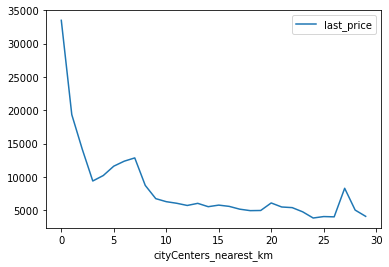

In [116]:
center.plot()
plt.show()

<div class="alert alert-block alert-info">
Судя по графику, радиус центра в Питере - 3 км. После этого имеется интересный скачок в цене на уровне 7 км и затем цены идут значительно ниже.
</div>

<h6><div class="alert alert-block alert-info">
Изучаем сегмент квартир в центре города Санкт-Петербург
  </div></h6>

In [124]:
piter_center = piter.query('cityCenters_nearest_km <= 3')
piter_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 24 to 23602
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            609 non-null    int64         
 1   last_price              609 non-null    float64       
 2   total_area              609 non-null    float64       
 3   first_day_exposition    609 non-null    object        
 4   rooms                   609 non-null    int64         
 5   ceiling_height          609 non-null    float64       
 6   floors_total            609 non-null    int64         
 7   living_area             609 non-null    float64       
 8   floor                   609 non-null    int64         
 9   is_apartment            609 non-null    bool          
 10  studio                  609 non-null    bool          
 11  open_plan               609 non-null    bool          
 12  kitchen_area            609 non-null    float64

In [126]:
columns = ['total_area','rooms', 'last_price','ceiling_height','floor','cityCenters_nearest_km','time_to_day']
piter_center2 = pd.DataFrame(piter_center, columns = columns)
piter_center2

,total_area,rooms,last_price,ceiling_height,floor,cityCenters_nearest_km,time_to_day
24,97.2,2,6500.0,2.725,1,2.0,2015-10-31
99,90.0,4,9600.0,2.800,2,3.0,2017-09-26
138,40.0,2,4800.0,2.700,2,3.0,2017-11-18
154,80.0,3,8200.0,4.150,2,3.0,2018-11-06
179,108.7,3,14800.0,4.000,5,3.0,2019-04-11
...,...,...,...,...,...,...,...
23369,129.0,3,20900.0,3.020,7,2.0,2016-05-13
23387,50.0,1,5600.0,2.600,1,3.0,2017-08-21
23399,97.0,3,15300.0,3.500,2,1.0,2017-01-11
23430,38.0,1,5260.0,3.300,1,3.0,2018-11-06


<div class="alert alert-block alert-info">
Изучим общую площадь, представленную в центре.
</div>

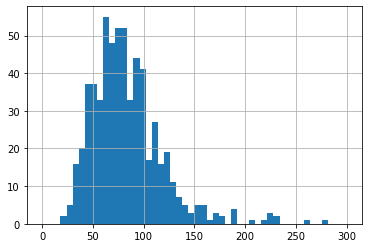

In [127]:
piter_center2['total_area'].hist( range = (0, 300),bins = 50)
plt.show()

In [131]:
piter_center2['total_area'].describe()

count    609.000000
mean      82.932315
std       35.410697
min       22.700000
25%       60.000000
50%       77.800000
75%       98.400000
max      280.000000
Name: total_area, dtype: float64

<div class="alert alert-block alert-info">
Вопреки ожиданиям о большом количестве доходной недвижимости маленькой площади, наибольшее количество квартир обладает площадью от 70 до 100м2,

посмотрим как эта площадь отражается в количестве комнат. 
</div>

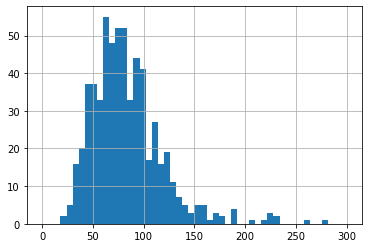

In [133]:
piter_center2['total_area'].hist( range = (0, 300),bins = 50)
plt.show()


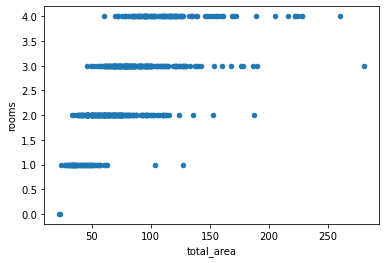

In [136]:
piter_center2.plot(y = 'rooms', x = 'total_area', kind = 'scatter')
plt.show()

<div class="alert alert-block alert-info">
И опять на графике видим, что преобладают 3 и 4 комнатные квартиры большей площади. Видимо наследие былых времен с царскими амбициями.
</div>

<div class="alert alert-block alert-info">
Изучим, насколько цена зависит от близости к центральной точке, "нулевому" километру.
</div>

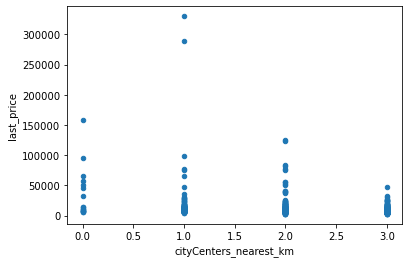

In [138]:
piter_center2.plot(y = 'last_price', x = 'cityCenters_nearest_km', kind = 'scatter')
plt.show()

<div class="alert alert-block alert-info">
Как видим - на любом километре распределение цены примерно схожее - центр и есть центр в любой из этих точек.
</div>

<div class="alert alert-block alert-info">
Центр славится высокими потолками, как элементом престижа. Так ли это на самом деле?
</div>

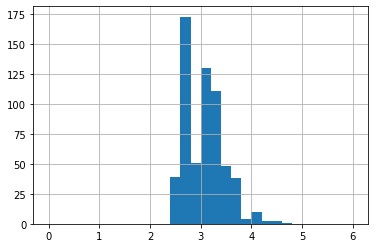

In [143]:
piter_center2['ceiling_height'].hist( range = (0, 6),bins = 30)
plt.show()



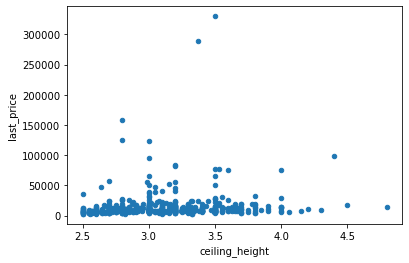

In [144]:
piter_center2.plot(y = 'last_price', x = 'ceiling_height', kind = 'scatter')
plt.show()

<div class="alert alert-block alert-info">
На гистограмме имеется 2 характерных пика - на отметке типовых 2.7м, которые скорее всего относятся к более современным постройкам, и чуть больше 3метров (3.10-3.30м) которые отражают сталинские и довоенные дома. 
    
Что касается корреляции с ценой, то потолок не является определяющим фактором цены. Место, место и ещё раз место.
</div>

<div class="alert alert-block alert-info">
Отношение цены и этажа квартиры. 
</div>

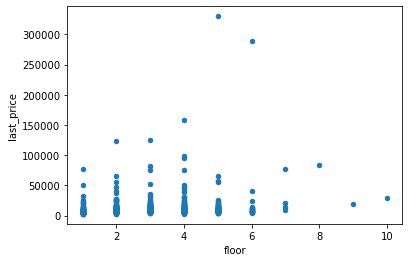

In [153]:
piter_center2.plot(y = 'last_price', x = 'floor', kind = 'scatter')
plt.show()

<div class="alert alert-block alert-info">
Как видим из результата, высоких зданий в центре практически нет и каждый ценит свой - кто-то первый для бизнеса, кому-то легче на второй подниматься, а выше 4-ого - уже "видовые".
</div>

<h7><div class="alert alert-block alert-info">
Изменение цены во времени
  </div></h7>

<h7><div class="alert alert-block alert-info">
Среди факторов теоретически влияющих на стоимость объекта в центре мы отмели высоту потолков и увеличение цены по мере приближения к центральной точке. Но как насчет поверья, что недвижимость в центре только дорожает?
  </div></h7>

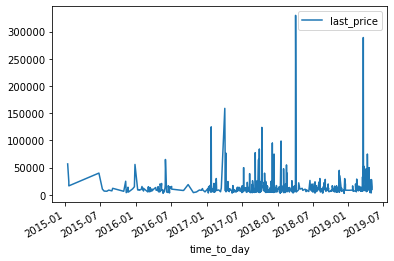

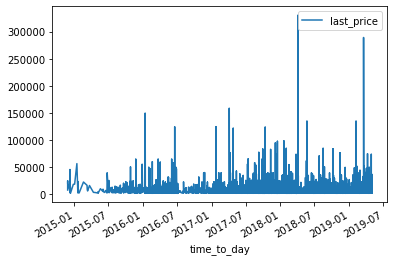

In [155]:
piter_center2.plot(y = 'last_price', x = 'time_to_day')
good_real.plot(y = 'last_price', x = 'time_to_day')
plt.show()

<h7><div class="alert alert-block alert-info">
Как и в целом по рынку, основной пик был в середине 2017 и затем цены немного снизились, за исключением нескольких экстраординарных сделок.
  </div></h7>

 <strong><em><h1>
Шаг 5 общие выводы. </em></strong></h1>

<h7><div class="alert alert-block alert-info">
На удивление мало факторов влияет на стоимость объекта недвижимости по-настоящему. 
Первый фактор это месторасположение. Питер стоит значительно дороже пригорода, центр превосходит любой спальный район.
Второй фактор это общее экономическое положение, как внешний фактор. Если есть спрос, то он влияет на все цены, если спроса нет, то цена падает на всю недвижимость и этажность, площадь и тому подобное не влияет. 

  </div></h7>